### <center> Applied Data Science Capstone by IBM/Coursera </center>


## <center> Capstone Project </center>

## <center> Topic: </center>
#   <center> Tourist information for the boroughs in Berlin  </center>
<br> </br>



## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

# Introduction <a name="introduction"></a>

**Berlin** is a great city for tourists. It is not a surprise that it is ranked as the most visited German city by <a href="https://www.worldatlas.com/articles/the-10-most-visited-cities-in-germany.html" target="_blank" rel="noopener">Worldatlas</a> with 31.1 milion tourists for 2016. However, as a tourist, you may find it **diffucult** to find out in which part of the city you should spend most of your time while being in Berlin. Especially for the tourists going in Berlin only for a day or a weekend. The city is really big and it is divided in 96 boroughs, full of great places to visit. The questions I will try to answer are:
<p> <b>1) Which borough(s) has the highest variaty of venues? </b></p>
<p> <b>2) What is the most common type of restaurants in Berlin? </b></p>
<p> <b>3) Which borough(s) is near to Art Gallery? </b></p>

The main audience which may benefit by answering the questions above is the **one-day tourists.** It will be extremely valuable for them to know in which district should they spend their only day in Berlin in order to get the best out of it and also to have more specific expectations from Berlin as a touristic destination.

# Data <a name="data"></a>

Based on definition of the problem, factors that will influence the solution are:
* geolocation of the Berlin boroughs and venues
* number of unique categories of venues in the borough

In order to get this data, I decided to use two data providers:
* the list of the names of boroughs will be obtained from **Wikipedia**
* number of unique categories of venues in the boroughs and the location of the venues will be obtained using **Foursquare API**

### Obtaining the names of the Berlin boroughs from Wikipedia



#### Installing the necessary libriaries

In [38]:
! pip install pandas
import pandas as pd

from pandas.io.html import read_html

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests

from pandas.io.json import json_normalize 

!conda install -c conda-forge folium=0.5.0 --yes
import folium

import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries installed")

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries installed


#### Obtaining the data from Wikipedia

In [2]:
page = "https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin"

wikitables = read_html(page, attrs={"class":"wikitable"})
print("Exracted {num} wikitables".format(num=len(wikitables)))

Exracted 13 wikitables


#### Converting the Wikitable into a Pandas DataFrame

In [3]:
df1 = pd.DataFrame(wikitables[1])
df2 = pd.DataFrame(wikitables[2])
df3 = pd.DataFrame(wikitables[3])
df4 = pd.DataFrame(wikitables[4])
df5 = pd.DataFrame(wikitables[5])
df6 = pd.DataFrame(wikitables[6])
df7 = pd.DataFrame(wikitables[7])
df8 = pd.DataFrame(wikitables[8])
df9 = pd.DataFrame(wikitables[9])
df10 = pd.DataFrame(wikitables[10])
df11 = pd.DataFrame(wikitables[11])
df12 = pd.DataFrame(wikitables[12])

#### Concatenating all wikitables into one Pandas DataFrame 

In [37]:
district_list = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)
district_list.head()

,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,Map
0,(0101) Mitte,10.70,79582,7445,NaN
1,(0102) Moabit,7.72,69425,8993,NaN
2,(0103) Hansaviertel,0.53,5889,11111,NaN
3,(0104) Tiergarten,5.17,12486,2415,NaN
4,(0105) Wedding,9.23,76363,8273,NaN


#### Removing the unnecessary columns

In [5]:
dropped_df = district_list.drop(columns=['Population as of 2008', 'Density inhabitants per km²', 'Map'], axis=1)
dropped_df.head()

,Locality,Area in km²
0,(0101) Mitte,10.70
1,(0102) Moabit,7.72
2,(0103) Hansaviertel,0.53
3,(0104) Tiergarten,5.17
4,(0105) Wedding,9.23


#### Renaming the Locality column into District

In [6]:
renamed_df = dropped_df.rename(columns={"Locality": "District"})
renamed_df.head()

,District,Area in km²
0,(0101) Mitte,10.70
1,(0102) Moabit,7.72
2,(0103) Hansaviertel,0.53
3,(0104) Tiergarten,5.17
4,(0105) Wedding,9.23


#### Removing the codes from the District names

In [7]:
renamed_df['District'] = pd.DataFrame(renamed_df['District'].str[7:])
renamed_df.head()

,District,Area in km²
0,Mitte,10.70
1,Moabit,7.72
2,Hansaviertel,0.53
3,Tiergarten,5.17
4,Wedding,9.23


#### Importing the Geospatial data of the Districts

In [8]:
geo_data = pd.read_csv('/Users/kirilyunakov/Downloads/Berlin_District_Coordinates.csv')
geo_data.head()

,Locale,Lat,Long
0,Mitte,52.519444,13.406667
1,Moabit,52.533333,13.333333
2,Hansaviertel,52.516667,13.338889
3,Tiergarten,52.516667,13.366667
4,Wedding,52.550000,13.366667


#### Renaming the column based on which will perform the merge (District)

In [9]:
renamed_geo_data = geo_data.rename(columns={'Locale': 'District'})
renamed_geo_data.head()

,District,Lat,Long
0,Mitte,52.519444,13.406667
1,Moabit,52.533333,13.333333
2,Hansaviertel,52.516667,13.338889
3,Tiergarten,52.516667,13.366667
4,Wedding,52.550000,13.366667


#### Merging the Geospatial data with the data from Wikipedia based on the District name

In [10]:
result = pd.merge(renamed_df, renamed_geo_data, on='District', how='left')
result.head()

,District,Area in km²,Lat,Long
0,Mitte,10.70,52.519444,13.406667
1,Moabit,7.72,52.533333,13.333333
2,Hansaviertel,0.53,52.516667,13.338889
3,Tiergarten,5.17,52.516667,13.366667
4,Wedding,9.23,52.550000,13.366667


# Methodology <a name="methodology"></a>

In this project we will allocate our efforts on 

distribution analysis using 
one hot encoding




Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.






In this project we will direct our efforts on detecting areas of Berlin that have low restaurant density, particularly those with low number of Italian restaurants. We will limit our analysis to area ~6km around city center.

In first step we have collected the required data: location and type (category) of every restaurant within 6km from Berlin center (Alexanderplatz). We have also identified Italian restaurants (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of 'restaurant density' across different areas of Berlin - we will use heatmaps to identify a few promising areas close to center with low number of restaurants in general (and no Italian restaurants in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create clusters of locations that meet some basic requirements established in discussion with stakeholders: we will take into consideration locations with no more than two restaurants in radius of 250 meters, and we want locations without Italian restaurants in radius of 400 meters. We will present map of all such locations but also create clusters (using k-means clustering) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

In [11]:
neighborhoods = result

#### Create a map of Berlin with the districts locations

In [12]:
address = 'Berlin'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin are 52.5170365, 13.3888599.


In [13]:
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=10.5)

for lat, lng, neighborhood in zip(neighborhoods['Lat'], neighborhoods['Long'], neighborhoods['District']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

#### Displaying the distribution

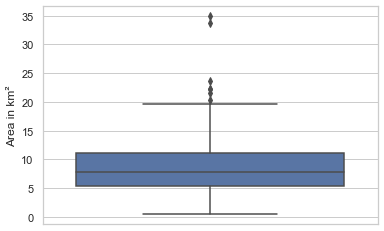

In [39]:
sns.set(style="whitegrid")
sns.boxplot(y='Area in km²', data=neighborhoods)

#### 5-10km2 is the size of the 50% of the districts
This will allows us to set a appropriate perimater for our radius of scan.

#### Define Foursquare Credentials and Version

In [15]:
CLIENT_ID = 'X0UR5GR2EL3FBUPRBTPQW0M1XOECT3RPNNPUXEPACXEPO44J' 
CLIENT_SECRET = 'ANFDRV2DKSZG1J453PD3JW0V4DHM4FDKLR5UHFVDEW5IYFZO' 
VERSION = '20180605'

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: X0UR5GR2EL3FBUPRBTPQW0M1XOECT3RPNNPUXEPACXEPO44J
CLIENT_SECRET:ANFDRV2DKSZG1J453PD3JW0V4DHM4FDKLR5UHFVDEW5IYFZO


#### Let's explore the first district in our dataframe and get the district lat and long values

In [16]:
neighborhood_name = neighborhoods.loc[0, 'District']
neighborhood_latitude = neighborhoods.loc[0, 'Lat'] 
neighborhood_longitude = neighborhoods.loc[0, 'Long'] 



print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Mitte are 52.51944399999999, 13.406667.


#### Now, let's get the top 100 venues that are in Mitte within a radius of 5000 meters.

In [17]:
LIMIT = 100 
radius = 5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()


#### Function that extracts the category of the venue

In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']  
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Fat Tire Bike Tours,Bike Rental / Bike Share,52.521233,13.409110
1,19grams,Coffee Shop,52.522767,13.407041
2,Buchhandlung Walther König,Bookstore,52.521301,13.400758
3,Lustgarten,Garden,52.518469,13.399454
4,Father Carpenter,Coffee Shop,52.524469,13.406614


#### And how many venues from Mitte were returned by Foursquare?

In [20]:
(nearby_venues.shape[0])

100

### Explore the neighborhoods in Berlin

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
res=getNearbyVenues(names=neighborhoods.District, latitudes=neighborhoods.Lat,
                    longitudes=neighborhoods.Long)
res

Mitte
Moabit
Hansaviertel
Tiergarten
Wedding
Gesundbrunnen
Friedrichshain
Kreuzberg
Prenzlauer Berg
Weißensee
Blankenburg
Heinersdorf
Karow
Stadtrandsiedlung Malchow
Pankow
Blankenfelde
Buch
Französisch Buchholz
Niederschönhausen
Rosenthal
Wilhelmsruh
Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord
Halensee
Spandau
Haselhorst
Siemensstadt
Staaken
Gatow
Kladow
Hakenfelde
Falkenhagener Feld
Wilhelmstadt
Steglitz
Lichterfelde
Lankwitz
Zehlendorf
Dahlem
Nikolassee
Wannsee
Schöneberg
Friedenau
Tempelhof
Mariendorf
Marienfelde
Lichtenrade
Neukölln
Britz
Buckow
Rudow
Gropiusstadt
Alt-Treptow
Plänterwald
Baumschulenweg
Johannisthal
Niederschöneweide
Altglienicke
Adlershof
Bohnsdorf
Oberschöneweide
Köpenick
Friedrichshagen
Rahnsdorf
Grünau
Müggelheim
Schmöckwitz
Marzahn
Biesdorf
Kaulsdorf
Mahlsdorf
Hellersdorf
Friedrichsfelde
Karlshorst
Lichtenberg
Falkenberg
Malchow
Wartenberg
Neu-Hohenschönhausen
Alt-Hohenschönhausen
Fennpfuhl
Rummelsburg
Reinickendorf
Tegel
Kon

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.519444,13.406667,Block House,52.520469,13.405278,Steakhouse
1,Mitte,52.519444,13.406667,Fat Tire Bike Tours,52.521233,13.409110,Bike Rental / Bike Share
2,Mitte,52.519444,13.406667,LUSH,52.519844,13.410409,Cosmetics Shop
3,Mitte,52.519444,13.406667,Radisson Blu,52.519580,13.402730,Hotel
4,Mitte,52.519444,13.406667,Titus,52.520950,13.405921,Board Shop
5,Mitte,52.519444,13.406667,Neptunbrunnen,52.519539,13.406925,Fountain
6,Mitte,52.519444,13.406667,Tigertörtchen,52.517150,13.407926,Cupcake Shop
7,Mitte,52.519444,13.406667,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum
8,Mitte,52.519444,13.406667,Pylones,52.519472,13.403327,Gift Shop
9,Mitte,52.519444,13.406667,THE REED,52.522249,13.408036,Restaurant


#### How many venues from Berlin were returned by Foursquare?

In [23]:
berlin_venues = res
(berlin_venues.shape)

(1473, 7)

### Let's check how many different venues were returned for each neighborhood

In [40]:
berlin_grouped=berlin_venues.groupby('Neighborhood').nunique('Venue Category')
berlin_grouped.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Adlershof,1,1,1,9,9,9,8
Alt-Hohenschönhausen,1,1,1,1,1,1,1
Alt-Treptow,1,1,1,19,19,19,15
Altglienicke,1,1,1,7,7,7,6
Baumschulenweg,1,1,1,14,14,14,8


### 1) Which borough(s) has the highest variaty of venues?

In [25]:
berlin_grouped.sort_values('Venue Category', ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Mitte,1,1,1,99,100,100,66
Friedrichshain,1,1,1,79,80,80,48
Prenzlauer Berg,1,1,1,84,85,85,47
Neukölln,1,1,1,82,82,82,45
Schöneberg,1,1,1,67,67,67,44
Steglitz,1,1,1,59,60,61,38
Gesundbrunnen,1,1,1,46,47,47,35
Spandau,1,1,1,33,34,34,30
Kreuzberg,1,1,1,29,29,29,25


As we see Mitte has exactly 99 venues whithin 5000 m with 66 different types of venues. Which is not surprising because the area is located in the heart of Berlin. We also noted that all neighborhoods have at least 1 venue.

## Analyze Each Neighborhood

# Methodology <a name="methodology"></a>

In [26]:
# one hot encoding
sg_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sg_onehot['Neighborhood'] = berlin_venues['Neighborhood'] 

# move neighborhood column to the first column
cols = sg_onehot.columns.tolist()
cols.insert(0, cols.pop(cols.index('Neighborhood')))

sg_onehot = sg_onehot.reindex(columns= cols)
sg_onehot

,Neighborhood,ATM,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo Exhibit
0,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
berlin_grouped = sg_onehot.groupby('Neighborhood').mean().reset_index()
berlin_grouped.head()

,Neighborhood,ATM,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo Exhibit
0,Adlershof,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alt-Hohenschönhausen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alt-Treptow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.105263,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Altglienicke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Baumschulenweg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
berlin_grouped = berlin_grouped.drop('Neighborhood', axis=1)
berlin_grouped = berlin_grouped.astype(float)
(berlin_grouped.sum(axis=0).sort_values())

Tour Provider                0.010000
Souvenir Shop                0.010000
Gift Shop                    0.010000
Hobby Shop                   0.010000
Wine Shop                    0.010000
Inn                          0.010000
Science Museum               0.010000
Cupcake Shop                 0.010000
Men's Store                  0.010000
Bike Rental / Bike Share     0.010000
Dumpling Restaurant          0.011765
Indie Theater                0.011765
Empanada Restaurant          0.011765
Himalayan Restaurant         0.011765
Israeli Restaurant           0.011765
Polish Restaurant            0.011765
Winery                       0.011765
Planetarium                  0.011765
Boutique                     0.011765
Fish & Chips Shop            0.012195
Yoga Studio                  0.012195
Cheese Shop                  0.012195
Street Art                   0.012195
Road                         0.012500
Sauna / Steam Room           0.012500
Caribbean Restaurant         0.012500
Bagel Shop  

 The most common venue's  categories are Supermarket , Bus Station, Café ,  Bakery and Italian Restaurant.

### 2) What is the most common type of restaurants in Berlin?

The Italian restaurant is the most common type of restaurant in Berlin.

### Explore all neighborhoods which is near to the art gallery

In [29]:
#get a list of a neighboorhoods names
art_buildings=sg_onehot[sg_onehot["Art Gallery"]>0].Neighborhood.unique().tolist()
art_buildings

['Mitte', 'Moabit', 'Hansaviertel', 'Kreuzberg', 'Buch', 'Wannsee', 'Neukölln']

In [30]:
# subset all geo locations and highlight on the map:
sg_art_neighboors = berlin_venues[(berlin_venues["Neighborhood"].isin(art_buildings))]
sg_art_neighboors=sg_art_neighboors.iloc[:,0:3]
sg_art_neighboors.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,Mitte,52.519444,13.406667
1,Mitte,52.519444,13.406667
2,Mitte,52.519444,13.406667
3,Mitte,52.519444,13.406667
4,Mitte,52.519444,13.406667


In [31]:
sg_art_neighboors.shape

(261, 3)

In [32]:
sg_art_neighboors=sg_art_neighboors.drop_duplicates()
sg_art_neighboors.shape

(7, 3)

In [33]:
map_sg = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(sg_art_neighboors['Neighborhood Latitude'], sg_art_neighboors['Neighborhood Longitude'], sg_art_neighboors['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sg)  
    
map_sg

As expected, most places, which are close to some art gelery, are located in the Central parts of Singapore.